### Math 170B - Homework 5

#### Polynomial interpolation: Newton form

**4.**

Write a program that takes as input data points $(x_i, y_i), i = 0, . . . , n$, and outputs the Newton form of the interpolating polynomial (coefficients are good enough).  Then use your program to interpolate the function
$$ f(x) = \frac{1}{1+x^2},
    \ \ \ \ \ \ x \in [-5,5]
$$
based on $15$ equidistantly sampled points.  Also compute the cubic spline $S$ that interpolates the function on these $15$ sample points (use a built-in function for that, for example, in MATLAB, use the command ”spline”).

Plot the sample points off, the Newton interpolation polynomial $p$ and the spline $S$ in one figure. What is your conclusion from looking at these plots?

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

Partition into $15$ equidistantly sampled points in the interval $[-5,5]$, denoted by $\{x_i\}_{i=1}^{15}$ and $y_i = f(x_i)$.

In [2]:
# 15 equidistantly sampled points
x_points = np.linspace(-5,5,15)
y_points = 1 / (1 + x_points**2)

# Grid of x to interpolate polynomials
x_grid = np.linspace(-5,5,201)
y_grid = 1 / (1 + x_grid**2)

1. **Newton** form of interpolating polynomial

Finding the coefficients $d_i$ for $0 \leq i \leq n$, where
$$ p(x) = \sum_{i-0}^n \ \bigg( d_i \prod_{j=0}^{i-1} (x - x_j) \bigg)
$$

In [3]:
def Newton_coef(data_x, data_y):
    
    n = len(data_x)
    d = np.zeros(n)
    
    for i in range(0,n):
        d[i] = data_y[i]
    
    for j in range(1,n):
        for i in range(n-1, j-1, -1):
            d[i] = (d[i] - d[i-1]) / (data_x[i] - data_x[i-j])
    
    return(d)

d = Newton_coef(x_points, y_points)

Interpolating using those polynomials.

In [5]:
def Newton_poly(x, data_x, coef):
    
    n = len(data_x)
    current_term = coef[n-1] + (x - data_x[n-1])
    
    for i in range(n-2, -1, -1):
        current_term = current_term * (x - data_x[i]) + coef[i]
    return(current_term)

y_newton = Newton_poly(x_grid, x_points, d)

2. __Splines__

In [6]:
y_splines = sp.interpolate.interp1d(x_points, y_points, kind='cubic')(x_grid)

3. __Plots__

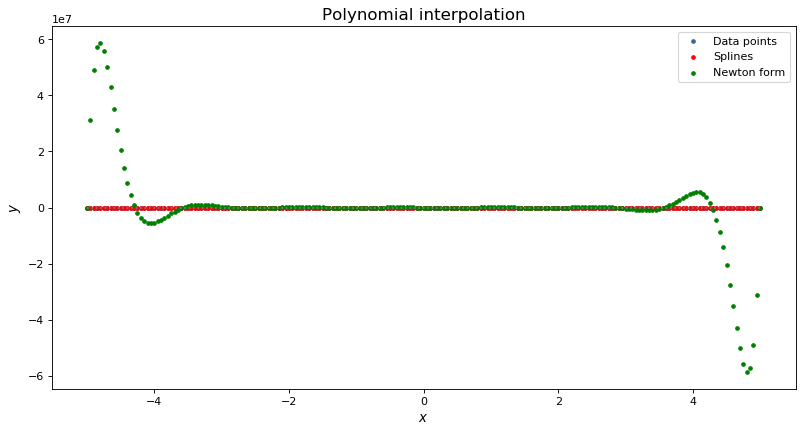

In [14]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_grid, y_grid, ':', color = 'gray')
plt.scatter(x_grid, y_grid, s = 10, color = '#336699', label = 'Data points')
plt.scatter(x_grid, y_splines, s = 10, color = 'red', label = 'Splines')
plt.scatter(x_grid, y_newton, s = 10, color = 'green', label = 'Newton form')
plt.xlabel(r'$x$', fontsize = 12); plt.ylabel(r'$y$', fontsize = 12)
plt.title('Polynomial interpolation', fontsize = 15)
plt.legend()

plt.savefig('170B - HW5 - P4 - Polynomial Interpolation.png', bbox_inches='tight')